In [3]:
import json
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
import xml.etree.ElementTree as ET
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Task 1

## 1.Visualize sample images with annotated odometer regions

In [18]:
def visualize_images_with_annotations(data, images_folder, num_samples=3):
    fig, axs = plt.subplots(2, num_samples, figsize=(15, 7))

    for i, odometer_type in enumerate(['analog', 'digital']):
        odometer_samples = [sample for sample in data['odometers'] if sample['odometer_type'] == odometer_type][:num_samples]

        for j, sample in enumerate(odometer_samples):
            image_filename = sample['image']
            mileage = sample['mileage']

            image_path = os.path.join(images_folder, image_filename)
            img = Image.open(image_path)
            axs[i, j].imshow(img)

            axs[i, j].set_title(f"{odometer_type.capitalize()} Odometer\nMileage: {mileage}")
            axs[i, j].axis('off')

    plt.tight_layout()
    plt.show()

In [21]:
json_path = 'C:\\Users\\Arda Öztüner\\Desktop\\trodo-v01\\ground truth\\groundtruth.json'
image_folder = 'C:\\Users\\Arda Öztüner\\Desktop\\trodo-v01\\odometers'


In [22]:
#This code reads the specified JSON file and loads its contents into a Python data structure.
with open(json_path, 'r') as json_file:
    data = json.load(json_file)

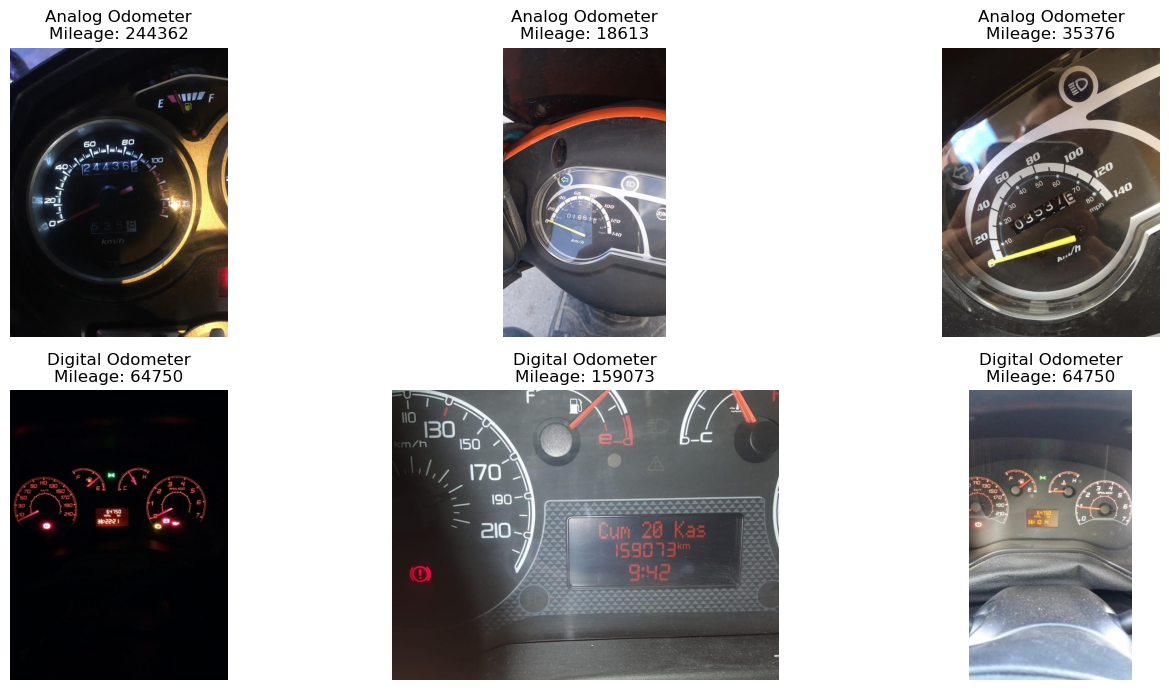

In [23]:
visualize_images_with_annotations(data, r'C:\\Users\\Arda Öztüner\\Desktop\\trodo-v01\\odometers')


## 2. Implement data preprocessing steps, including image resizing, normalization, and data augmentation if necessary. 

In [24]:
def load_data(data_path, json_data):
    #Empty lists are created to store image data and tags.
    images = []
    labels = []
    mileage_list = []  
    #Through a loop, it retrieves the value corresponding to the 'odometers' key in the JSON data.
    #It also reads mileage values.
    for odometer_info in json_data.get('odometers', []):
        image_filename = odometer_info.get('image')
        odometer_type = odometer_info.get('odometer_type')
        mileage = odometer_info.get('mileage')

        # Creates the full file path of the image using the data path and the image's filename.
        image_path = os.path.join(data_path, image_filename)
        #A try-except block is used to handle possible errors when opening the image.
        try:
            # The image file is opened using the Pillow library.
            img = Image.open(image_path)
            
            # The size of the image is checked. If the size of the image is 0, it is assumed to be an invalid or empty image and this is reported with an error message.
            if not img.size == 0:
                # The image is resized to 64x64 pixels.
                img = img.resize((64, 64))

                # The image is converted to a NumPy array and its flattened version is obtained. This converts the image to a flat vector.
                img_array = np.array(img).flatten()

                # The vectors we translate the image into are added to a list.
                images.append(img_array)
                #1 (digital) or 0 (analog) is added to the labels list, depending on the odometer type.
                labels.append(1 if "digital" in odometer_type else 0) 
                mileage_list.append(int(mileage))
            else:
                print(f"Hata: Resim geçerli değil veya boş - {image_path}")
        except Exception as e:
            print(f"Hata: Resim açılırken bir sorun oluştu - {image_path}")
            print(f"Hata detayları: {repr(e)}")

    return np.array(images), np.array(labels),np.array(mileage_list)

In [25]:
image_data = []
mileages = []


In [26]:
#The values returned by the load_data function are assigned to variables named images,labels and mileages.
images, labels, mileages = load_data(image_folder, data)


Hata: Resim açılırken bir sorun oluştu - C:\Users\Arda Öztüner\Desktop\trodo-v01\odometers\00000027-PHOTO-2020-11-20-20-21-52.jpg
Hata detayları: ValueError("invalid literal for int() with base 10: '127.8'")
Hata: Resim açılırken bir sorun oluştu - C:\Users\Arda Öztüner\Desktop\trodo-v01\odometers\00000029-PHOTO-2020-11-20-20-21-52.jpg
Hata detayları: ValueError("invalid literal for int() with base 10: '175.6'")
Hata: Resim açılırken bir sorun oluştu - C:\Users\Arda Öztüner\Desktop\trodo-v01\odometers\00000034-PHOTO-2020-11-20-20-53-22.jpg
Hata detayları: ValueError("invalid literal for int() with base 10: '127.8'")
Hata: Resim açılırken bir sorun oluştu - C:\Users\Arda Öztüner\Desktop\trodo-v01\odometers\00000036-PHOTO-2020-11-20-20-53-22.jpg
Hata detayları: ValueError("invalid literal for int() with base 10: '175.6'")
Hata: Resim açılırken bir sorun oluştu - C:\Users\Arda Öztüner\Desktop\trodo-v01\odometers\00000047-PHOTO-2020-11-20-22-59-59.jpg
Hata detayları: ValueError("invalid li

## 3.Choose at least three different machine learning algorithms for odometer type classification.

I used K-Nearest Neighbors, Support Vector Machines and Random Forests Classification Algorithms

## 4. Split the dataset into training and testing sets. 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

## 5. Train each selected algorithm on the training set 

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
svm_model=SVC(kernel='rbf')
svm_model.fit(X_train,y_train)

SVC()

In [30]:
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

## 6. Evaluate the trained models on the testing set using appropriate metrics (accuracy, precision, recall, F1 score). 

In [31]:
#KNN model evaluation
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1_score = f1_score(y_test, knn_predictions)

print("KNN Model Metrics:")
print(f"Accuracy: {knn_accuracy:.2f}")
print(f"Precison: {knn_precision:.2f}")
print(f"Recall: {knn_recall:.2f}")
print(f"F1 Score: {knn_f1_score:.2f}")

KNN Model Metrics:
Accuracy: 0.88
Precison: 0.86
Recall: 0.96
F1 Score: 0.91


In [32]:
##SVM model evaluation
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1_score = f1_score(y_test, svm_predictions)

print("SVM Model Metrics:")
print(f"Accuracy: {svm_accuracy:.2f}")
print(f"Precison: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"F1 Score: {svm_f1_score:.2f}")

SVM Model Metrics:
Accuracy: 0.92
Precison: 0.92
Recall: 0.96
F1 Score: 0.94


In [33]:
#Random Forest model evaluation
rfc_predictions = rfc_model.predict(X_test)
rfc_accuracy = accuracy_score(y_test, rfc_predictions)
rfc_precision = precision_score(y_test, rfc_predictions)
rfc_recall = recall_score(y_test, rfc_predictions)
rfc_f1_score = f1_score(y_test, rfc_predictions)

print("Random Forest Model Metrics:")
print(f"Accuracy: {rfc_accuracy:.2f}")
print(f"Precison: {rfc_precision:.2f}")
print(f"Recall: {rfc_recall:.2f}")
print(f"F1 Score: {rfc_f1_score:.2f}")

Random Forest Model Metrics:
Accuracy: 0.92
Precison: 0.92
Recall: 0.94
F1 Score: 0.93


## 7. Provide confusion matrices for a detailed analysis. 

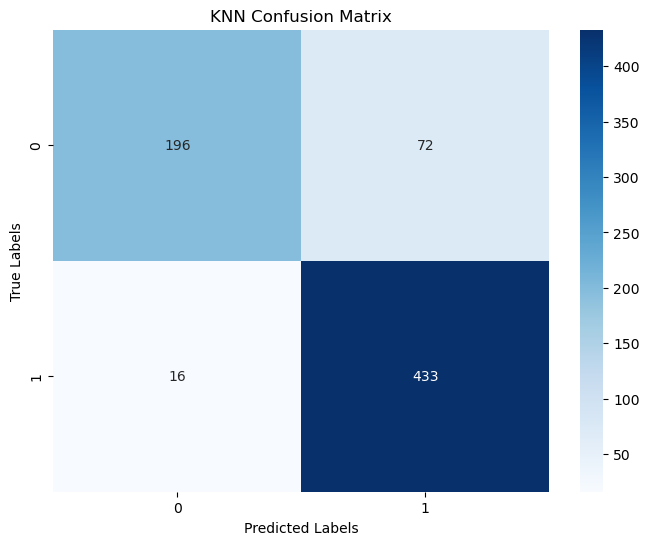

In [34]:
# KNN conufsion matrix 
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)

# Visualization the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

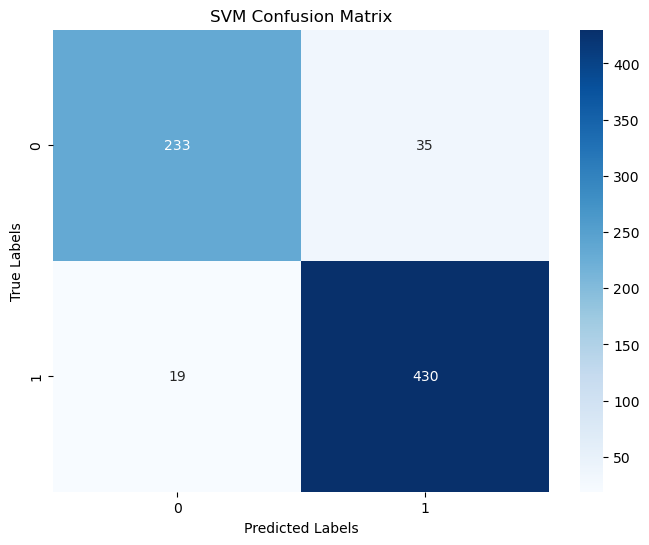

In [35]:
# SVM confusion matrix oluştur
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

# Visualization the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

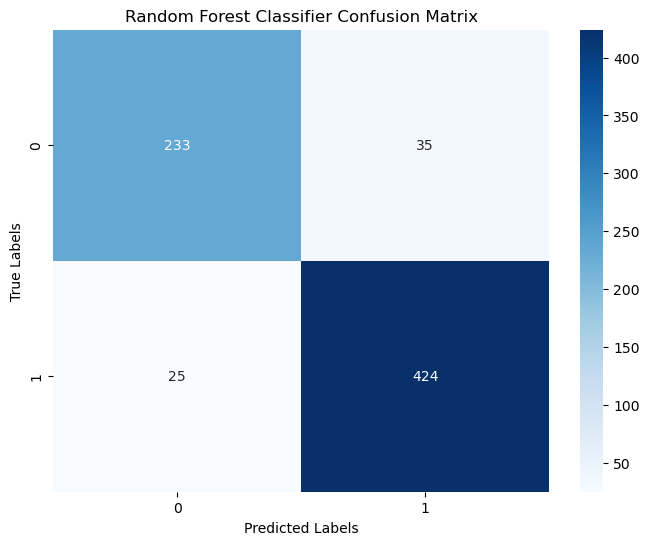

In [36]:
# Random Forest confusion matrix oluştur
rfc_conf_matrix = confusion_matrix(y_test, rfc_predictions)

# Visualization the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rfc_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Classifier Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## 8. Compare the performance of the different models. 

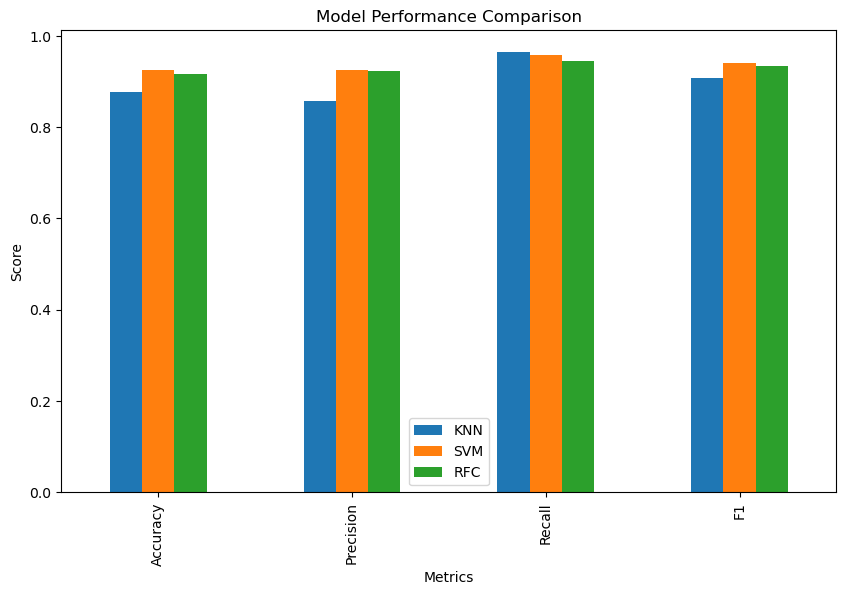

In [37]:
performance_dict = {
    'KNN': {'Accuracy': knn_accuracy, 'Precision': knn_precision, 'Recall': knn_recall, 'F1': knn_f1_score},
    'SVM': {'Accuracy': svm_accuracy, 'Precision': svm_precision, 'Recall': svm_recall, 'F1': svm_f1_score},
    'RFC': {'Accuracy': rfc_accuracy, 'Precision': rfc_precision, 'Recall': rfc_recall, 'F1': rfc_f1_score}
}
performance_df = pd.DataFrame(performance_dict)
performance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.show()

## An example prediction process 

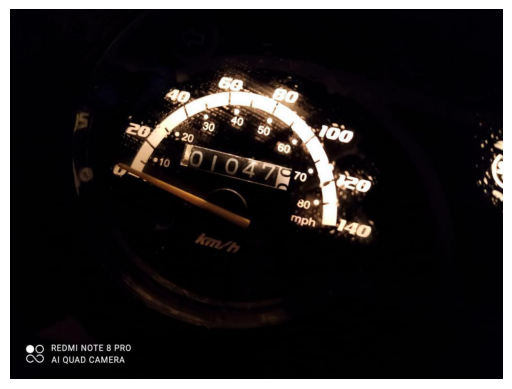

In [38]:
ex1_image_path = 'C:\\Users\\Arda Öztüner\\Desktop\\trodo-v01\\odometers\\00001584-PHOTO-2020-12-15-22-23-28.jpg'
img = Image.open(ex1_image_path)
# Print image to screen
plt.imshow(img)
plt.axis('off')  
plt.show()
print()

In [39]:
def predict_odometer_type(image_path, model):
    try:
        # Load and process image (using Pillow)
        img = Image.open(image_path)
        img = img.resize((64, 64))  # Resize image to 64x64 pixels
        img_array = np.array(img).flatten()  # Convert image to a flattened NumPy array

        # Make a prediction using the model
        prediction = model.predict([img_array])

        # Examine and return the prediction result
        if prediction[0] == 0:
            return "analog"
        else:
            return "dijital"
    except Exception as e:
        return f"Hata: {e}"

#Upload external image and make predictions
external_image_path = 'C:\\Users\\Arda Öztüner\\Desktop\\trodo-v01\\odometers\\00001584-PHOTO-2020-12-15-22-23-28.jpg'

# Prediction with KNN model
prediction_result_knn = predict_odometer_type(external_image_path, knn_model)
print(f"The KNN model predicted this external image as {prediction_result_knn}.")

# Prediction with SVM model
prediction_result_svm = predict_odometer_type(external_image_path, svm_model)
print(f"The SVM model predicted this external image as {prediction_result_svm}.")

# Predcition with Random Forest model
prediction_result_rfc = predict_odometer_type(external_image_path, rfc_model)
print(f"The Random forest model predicted this external image as {prediction_result_rfc}.")

      

The KNN model predicted this external image as analog.
The SVM model predicted this external image as analog.
The Random forest model predicted this external image as dijital.


In [40]:
ex2_image_path = 'C:\\Users\\Arda Öztüner\\Desktop\\Jeep_Odometer.jpg'
prediction_result_knn = predict_odometer_type(ex2_image_path, knn_model)
print(f"The KNN model predicted this external image as {prediction_result_knn}.")

# Prediction with SVM model
prediction_result_svm = predict_odometer_type(ex2_image_path, svm_model)
print(f"The SVM model predicted this external image as {prediction_result_svm}.")

# Predcition with Random Forest model
prediction_result_rfc = predict_odometer_type(ex2_image_path, rfc_model)
print(f"The Random forest model predicted this external image as {prediction_result_rfc}.")

The KNN model predicted this external image as dijital.
The SVM model predicted this external image as analog.
The Random forest model predicted this external image as analog.


# B) Task 2: Mileage Extraction 

#  1. Implement data preprocessing steps

In [4]:

image_folder = r"C:\Users\Arda Öztüner\Desktop\trodo-v01\odometers"
xml_folder = r"C:\Users\Arda Öztüner\Desktop\trodo-v01\pascal voc 1.1\Annotations"
image_size = (224, 224)  # Adjust the image size as we want

data = {'image_path': [], 'label': []}

# Read XML files and add relevant information to the data structure
for xml_filename in os.listdir(xml_folder):
    if xml_filename.endswith(".xml"):
        xml_path = os.path.join(xml_folder, xml_filename)
        tree = ET.parse(xml_path)
        root = tree.getroot()

        image_filename = root.find("filename").text
        image_path = os.path.join(image_folder, image_filename)

      # Extract the tag value as text
        label = root.find("object/name").text

        data['image_path'].append(image_path)
        data['label'].append(label)


df = pd.DataFrame(data)


In [5]:
df

,image_path,label
0,C:\Users\Arda Öztüner\Desktop\trodo-v01\odomet...,odometer
1,C:\Users\Arda Öztüner\Desktop\trodo-v01\odomet...,X
2,C:\Users\Arda Öztüner\Desktop\trodo-v01\odomet...,X
3,C:\Users\Arda Öztüner\Desktop\trodo-v01\odomet...,3
4,C:\Users\Arda Öztüner\Desktop\trodo-v01\odomet...,6
...,...,...
2384,C:\Users\Arda Öztüner\Desktop\trodo-v01\odomet...,odometer
2385,C:\Users\Arda Öztüner\Desktop\trodo-v01\odomet...,3
2386,C:\Users\Arda Öztüner\Desktop\trodo-v01\odomet...,0
2387,C:\Users\Arda Öztüner\Desktop\trodo-v01\odomet...,X


In [6]:
def load_and_preprocess_images(image_paths):
    images = []
    for path in image_paths:
        img = Image.open(path)
        img = img.resize(image_size)
        img = np.array(img) / 255.0  # Normalize
        images.append(img)
    return np.array(images)

# 2. Choose at least two different machine learning algorithms for mileage extracion.

I chose 2 machine learning algorithms. Random forest classification algorithm and Suppurt vector classifier.

# 3.Split the dataset into training and testing sets.

In [7]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [8]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [9]:
train_images = load_and_preprocess_images(train_df['image_path'])
test_images = load_and_preprocess_images(test_df['image_path'])

In [10]:
labels = df['label'].unique()
label_to_index = {label: idx for idx, label in enumerate(labels)}

In [11]:
train_labels = np.array([label_to_index[label] for label in train_df['label']])
test_labels = np.array([label_to_index[label] for label in test_df['label']])

# 4. Train each selected algorithm on the training set for mileage extrac)on

## Random Forest 

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_model.fit(train_images.reshape(-1, image_size[0] * image_size[1] * 3), train_labels)

# Check accuracy on training set
train_predictions_rf = random_forest_model.predict(train_images.reshape(-1, image_size[0] * image_size[1] * 3))
train_accuracy_rf = accuracy_score(train_labels, train_predictions_rf)
print(f"Random Forest Train set Accuracy: {train_accuracy_rf}")

# Check accuracy on test set
test_predictions_rf = random_forest_model.predict(test_images.reshape(-1, image_size[0] * image_size[1] * 3))
test_accuracy_rf = accuracy_score(test_labels, test_predictions_rf)
print(f"Random Forest Test set Accuracy: {test_accuracy_rf}")


# Calculate precision for Random Forest
precision_rf = precision_score(test_labels, test_predictions_rf, average='weighted')
print(f"Random Forest Precision: {precision_rf}")

Random Forest Train set Accuracy: 0.9874411302982732
Random Forest Test set Accuracy: 0.2803347280334728
Random Forest Precision: 0.22613364413782774


C:\Users\Arda Öztüner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


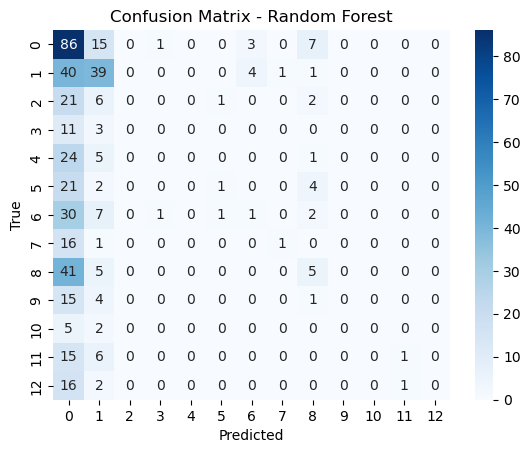

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Confusion matrix for Random Forest
cm_rf = confusion_matrix(test_labels, test_predictions_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

## Support Vector Classifier 

In [14]:
from sklearn.svm import SVC
# Get the dimensions of the training images
num_samples, height, width, num_channels = train_images.shape
# Reshape the training images into a 2D array
train_images_2d = train_images.reshape((num_samples, height * width * num_channels))
# Get the dimensions of the test images
num_samples_test, height_test, width_test, num_channels_test = test_images.shape
# Reshape the test images into a 2D array
test_images_2d = test_images.reshape((num_samples_test, height_test * width_test * num_channels_test))


In [15]:
svc=SVC()
svc.fit(train_images_2d, train_labels)


SVC()

In [16]:
y_pred_test = svc.predict(test_images_2d)

In [17]:
from sklearn.metrics import precision_score
accuracy_test = accuracy_score(test_labels, y_pred_test)
print("Test set accuracy for SVC:", accuracy_test)
precision = precision_score(test_labels, y_pred_test, average='weighted')
print("Precision for SVC:", precision)

Test set accuracy for SVC: 0.26778242677824265
Precision for SVC: 0.15570319827136178


C:\Users\Arda Öztüner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
